https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/


# Chapter One - Introduction to Time Series Data in Python

In [1]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")


In [2]:
# Download the data
data = et.data.get_data('colorado-flood')

## Precipitation data

In [3]:
# Define path to the data
file_path = os.path.join(et.io.HOME, 
                         "earth-analytics", 
                         "data",
                         "colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

# Import the file as a pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       # Import dates in datetime format
                                       parse_dates=['DATE'],
                                       # Set DATE as the index so subsets can be created by time period
                                       index_col=['DATE'],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values=['999.99'])

# View the data
boulder_precip_2003_2013.head()


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [4]:
# Get statistical overview for numeric columns
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [5]:
# Date is index, and is accessed as such
boulder_precip_2003_2013.index


DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

<AxesSubplot:title={'center':'Hourly Precipitation'}, xlabel='DATE'>

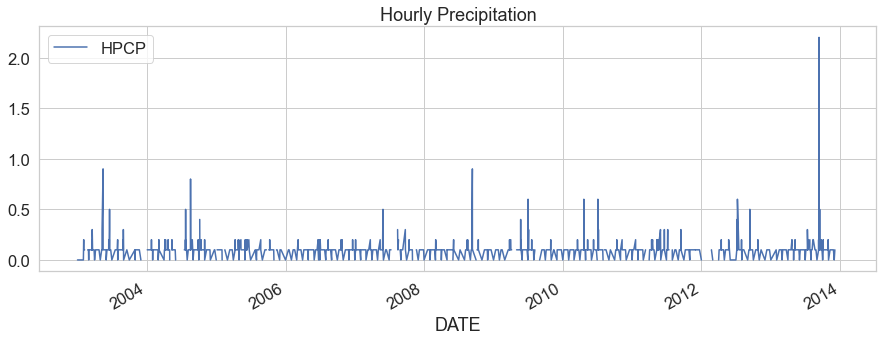

In [6]:
# Plot hourly precipitation
boulder_precip_2003_2013.plot(y="HPCP",
                              title="Hourly Precipitation",
                              figsize=(15,5))

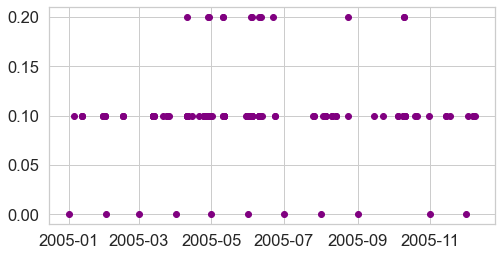

In [7]:
# Create subset and drop nan values
precip_2005 = boulder_precip_2003_2013.loc['2005'].dropna()

# Plot the data using native matplotlib
f, ax = plt.subplots(figsize=(8,4))
ax.scatter(precip_2005.index.values,
           precip_2005["HPCP"], color='purple')
plt.show()

### Resample Time Series

Resample data to show daily precipitation, instead of hourly. 

#### Example 1: Single plot, data from 2005

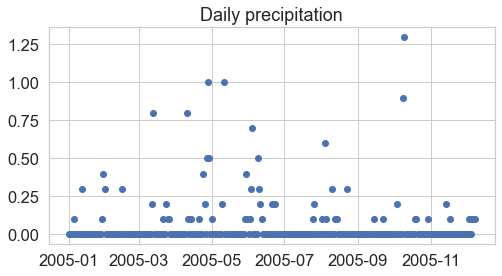

In [8]:
# Resample data: Daily precipitation
precip_2005_daily = precip_2005.resample("D").sum()

# Plot the data using native matplotlib
f, ax = plt.subplots(figsize=(8,4))
ax.scatter(x=precip_2005_daily.index.values,
           y=precip_2005_daily["HPCP"])
plt.title("Daily precipitation")
plt.show()


#### Example 2: Comparison of hourly and daily precipitation for 2012 and 2013   

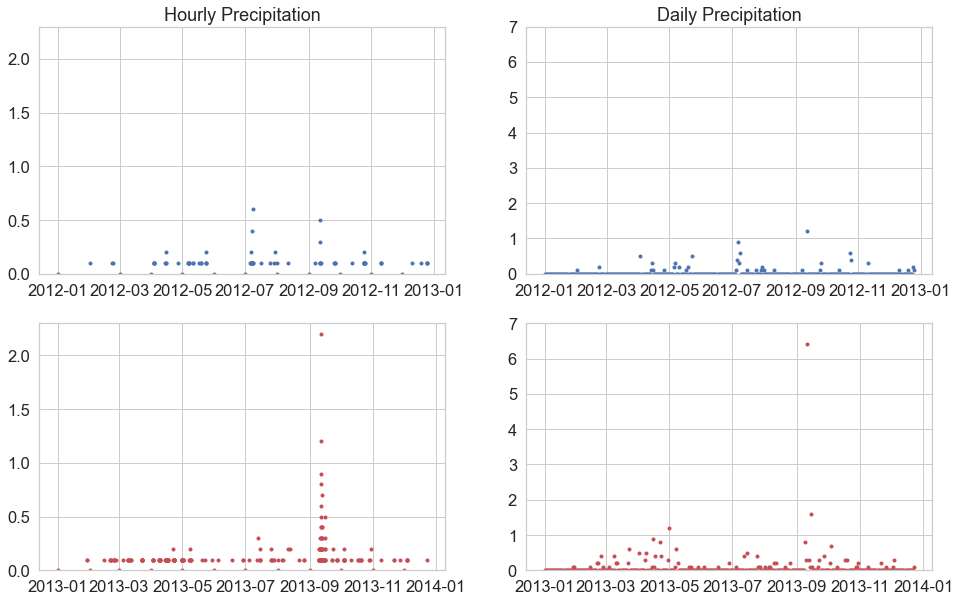

In [9]:
# Create subsets
precip_2012 = boulder_precip_2003_2013.loc['2012'].dropna()
precip_2013 = boulder_precip_2003_2013.loc['2013'].dropna()

precip_2012_daily = precip_2012.resample("D").sum()
precip_2013_daily = precip_2013.resample("D").sum()

# Plot the data using native matplotlib
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,10))
ax1.plot(precip_2012.index.values,
         precip_2012["HPCP"], 
         '.')
ax3.plot(precip_2013.index.values,
         precip_2013["HPCP"], 
         'r.')
ax2.plot(precip_2012_daily.index.values,
         precip_2012_daily["HPCP"],
         '.')
ax4.plot(precip_2013_daily.index.values,
         precip_2013_daily["HPCP"],
         'r.')

ax1.title.set_text('Hourly Precipitation')
ax2.title.set_text('Daily Precipitation')

ax1.set(ylim=[0,2.3])
ax2.set(ylim=[0,7])
ax3.set(ylim=[0,2.3])
ax4.set(ylim=[0,7])

plt.show()


#### Example 3: Comparison of daily precipitation, focussing on the flood

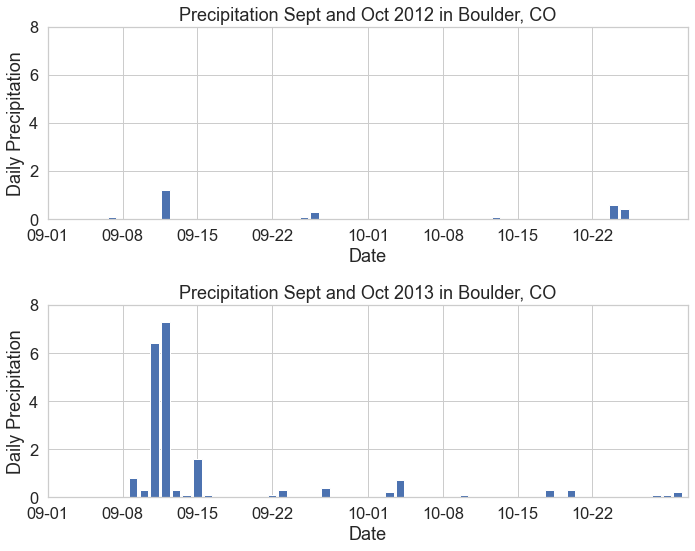

In [10]:
# Focus on flood data
precip_2013_daily_sept_oct = precip_2013_daily['2013-09-01':'2013-10-31']
precip_2012_daily_sept_oct = precip_2012_daily['2012-09-01':'2012-10-31']

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Create bar plot
ax1.bar(precip_2012_daily_sept_oct.index.values,
        precip_2012_daily_sept_oct["HPCP"])
ax2.bar(precip_2013_daily_sept_oct.index.values,
        precip_2013_daily_sept_oct["HPCP"])

# Define the date format
date_form = DateFormatter("%m-%d")
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

# Set titles, axis labels, limits
ax1.set(title="Precipitation Sept and Oct 2012 in Boulder, CO", 
        xlabel="Date", 
        ylabel="Daily Precipitation",
        xlim=[mdates.datestr2num('2012-09-01'), mdates.datestr2num('2012-10-31')],
        ylim=[0,8])
ax2.set(title="Precipitation Sept and Oct 2013 in Boulder, CO", 
        xlabel="Date", 
        ylabel="Daily Precipitation",
        xlim=[mdates.datestr2num('2013-09-01'), mdates.datestr2num('2013-10-31')],
        ylim=[0,8])

plt.tight_layout()
plt.show()


## Discharge data

Metadata:  
Location: USGS 06730200 BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO  
Measurement unit: Discharge, cubic feet per second (Mean)  
Data-value qualification codes included in this output:
* A  Approved for publication -- Processing and review completed.  
* e  Value has been estimated.  


In [11]:
# Get the data
file_path = os.path.join(et.io.HOME, 
                         "earth-analytics", 
                         "data",
                         "colorado-flood",
                         "discharge",
                         "06730200-discharge-daily-1986-2013.csv")

# Import the file as a pandas dataframe
stream_discharge = pd.read_csv(file_path)

In [12]:
# Understand data
stream_discharge.head()

,agency_cd,site_no,datetime,disValue,qualCode
0,USGS,6730200,10/1/86,30.0,A
1,USGS,6730200,10/2/86,30.0,A
2,USGS,6730200,10/3/86,30.0,A
3,USGS,6730200,10/4/86,30.0,A
4,USGS,6730200,10/5/86,30.0,A


In [13]:
stream_discharge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   agency_cd  9954 non-null   object 
 1   site_no    9954 non-null   int64  
 2   datetime   9954 non-null   object 
 3   disValue   9954 non-null   float64
 4   qualCode   9954 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 389.0+ KB


<AxesSubplot:>

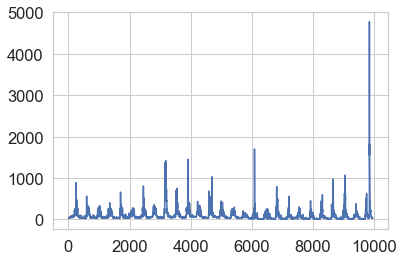

In [14]:
stream_discharge['disValue'].plot()

In [15]:
stream_discharge.groupby(['qualCode'])['disValue'].describe()

,count,mean,std,min,25%,50%,75%,max
qualCode,,,,,,,,
A,9631.0,95.869387,145.787108,0.87,34.0,55.0,111.0,4770.0
A:e,323.0,29.404334,22.633386,2.50,15.0,25.0,36.5,147.0


In [16]:
# Import data again, passing dates and setting index
stream_discharge = pd.read_csv(file_path,
                               # Import dates in datetime format
                               parse_dates=['datetime'],
                               # Set DATE as the index so subsets can be created by time period
                               index_col=['datetime'])

In [17]:
stream_discharge.head()

,agency_cd,site_no,disValue,qualCode
datetime,,,,
1986-10-01,USGS,6730200,30.0,A
1986-10-02,USGS,6730200,30.0,A
1986-10-03,USGS,6730200,30.0,A
1986-10-04,USGS,6730200,30.0,A
1986-10-05,USGS,6730200,30.0,A


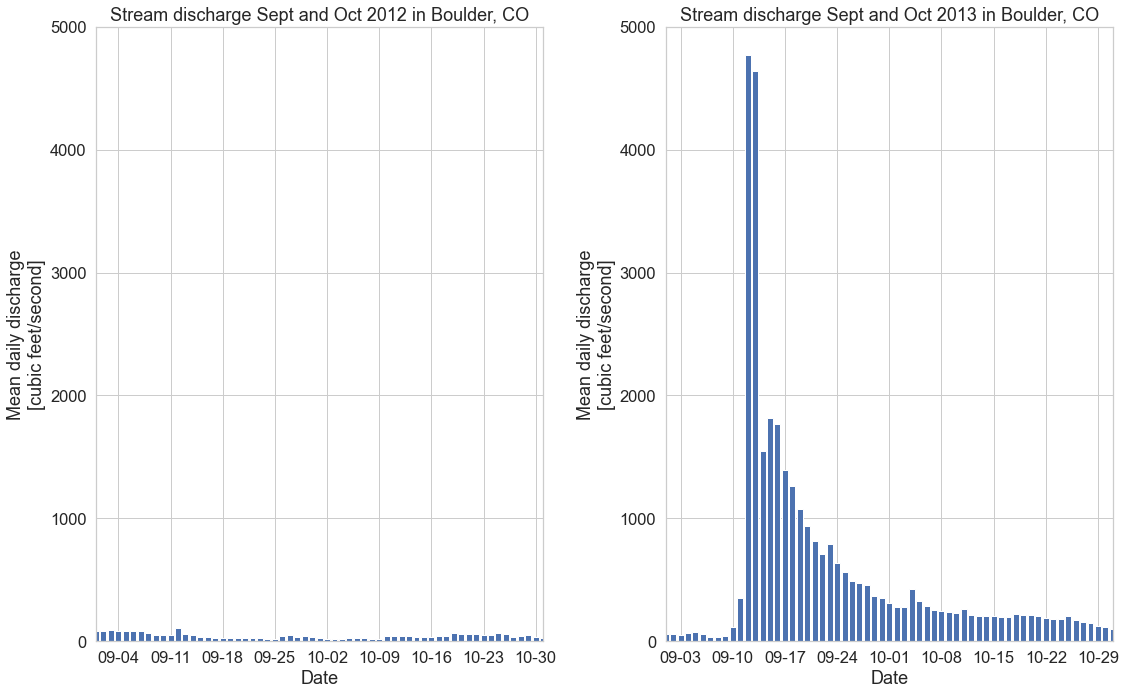

In [18]:
# Plot discharge for 2013 flood event, in comparison to 2012
stream_discharge_2013_sept_oct = stream_discharge['2013-09-01':'2013-10-31']
stream_discharge_2012_sept_oct = stream_discharge['2012-09-01':'2012-10-31']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

# Create bar plot
ax1.bar(stream_discharge_2012_sept_oct.index.values,
        stream_discharge_2012_sept_oct["disValue"])
ax2.bar(stream_discharge_2013_sept_oct.index.values,
        stream_discharge_2013_sept_oct["disValue"])

# Define the date format
date_form = DateFormatter("%m-%d")
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

# Set titles, axis labels, limits
ax1.set(title="Stream discharge Sept and Oct 2012 in Boulder, CO", 
        xlabel="Date", 
        ylabel="Mean daily discharge\n[cubic feet/second]",
        xlim=[mdates.datestr2num('2012-09-01'), mdates.datestr2num('2012-10-31')],
        ylim=[0,5000])
ax2.set(title="Stream discharge Sept and Oct 2013 in Boulder, CO", 
        xlabel="Date", 
        ylabel="Mean daily discharge\n[cubic feet/second]",
        xlim=[mdates.datestr2num('2013-09-01'), mdates.datestr2num('2013-10-31')],
        ylim=[0,5000])

plt.tight_layout()
plt.show()


## Get data using hydrofunctions

In [19]:
import hydrofunctions as hf
%matplotlib inline

# Define the site number and start and end dates that you are interested in
site = "06730500"
start = '1946-05-10'
end = '2018-08-29'

# Request data for that site and time period
longmont_resp = hf.get_nwis(site, 'dv', start, end)

# Convert the response to a json in order to use the extract_nwis_df function
longmont_resp = longmont_resp.json()

longmont_discharge = hf.extract_nwis_df(longmont_resp)


In [20]:
longmont_discharge.head()

,USGS:06730500:00060:00003,USGS:06730500:00060:00003_qualifiers
datetime,,
1946-05-10,16.0,A
1946-05-11,19.0,A
1946-05-12,9.0,A
1946-05-13,3.0,A
1946-05-14,7.8,A


In [21]:
longmont_discharge.rename(columns = {'USGS:06730500:00060:00003':'discharge', 
                                     'USGS:06730500:00060:00003_qualifiers':'flags'},
                          inplace = True)

<AxesSubplot:xlabel='datetime'>

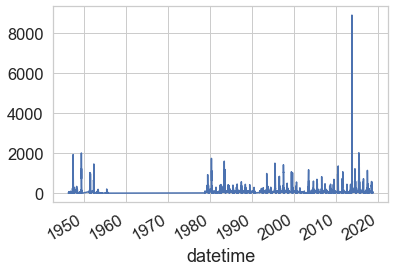

In [22]:
longmont_discharge['discharge'].plot()

In [23]:
longmont_discharge_yearly_max = longmont_discharge['1980':].resample('Y').max()
longmont_discharge_yearly_max.head()

,discharge,flags
datetime,,
1980-12-31,1740.0,A
1981-12-31,298.0,A
1982-12-31,432.0,A
1983-12-31,1600.0,A
1984-12-31,424.0,A


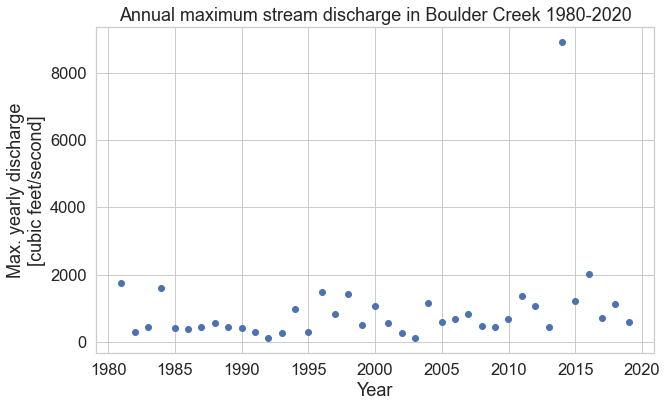

In [24]:
f, ax = plt.subplots(figsize=(10, 6))

# Create bar plot
ax.scatter(x=longmont_discharge_yearly_max.index.values,
           y=longmont_discharge_yearly_max['discharge'])

# Set titles, axis labels
ax.set(title="Annual maximum stream discharge in Boulder Creek 1980-2020", 
        xlabel="Year", 
        ylabel="Max. yearly discharge\n[cubic feet/second]")

plt.show()